# Punto 7

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

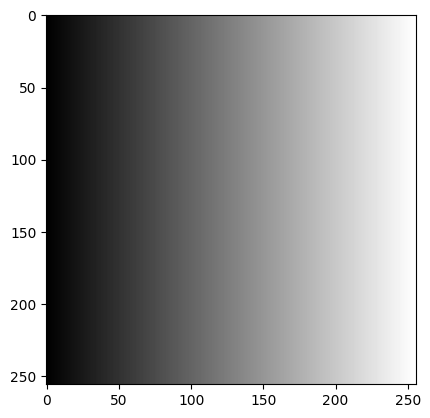

In [2]:
img = [[-1]*256 for _ in range(256)]
inv = [[-1]*256 for _ in range(256)]
for i in range(256):
    for j in range(256):
        img[j][i] = i
        inv[j][i] = 255 - i
img = np.array(img)
plt.imshow(img, cmap='gray')
plt.show()

# Imagenes de trabajo

In [3]:
AQUITAIN = cv2.imread("./images/AQUITAIN.png")
SCANNER = cv2.imread("./images/SCANNER.png")

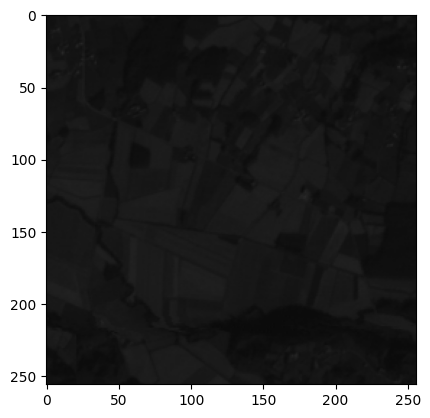

In [4]:
plt.imshow(AQUITAIN, cmap='gray')
plt.show()

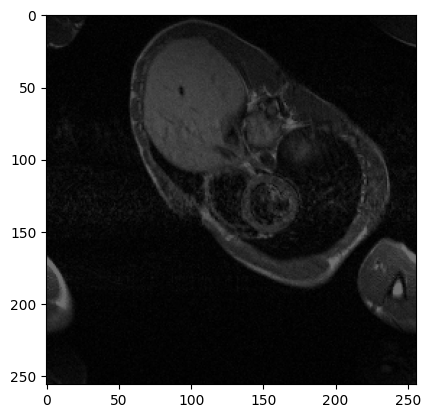

In [5]:
plt.imshow(SCANNER, cmap='gray')
plt.show()

# Paleta de colores

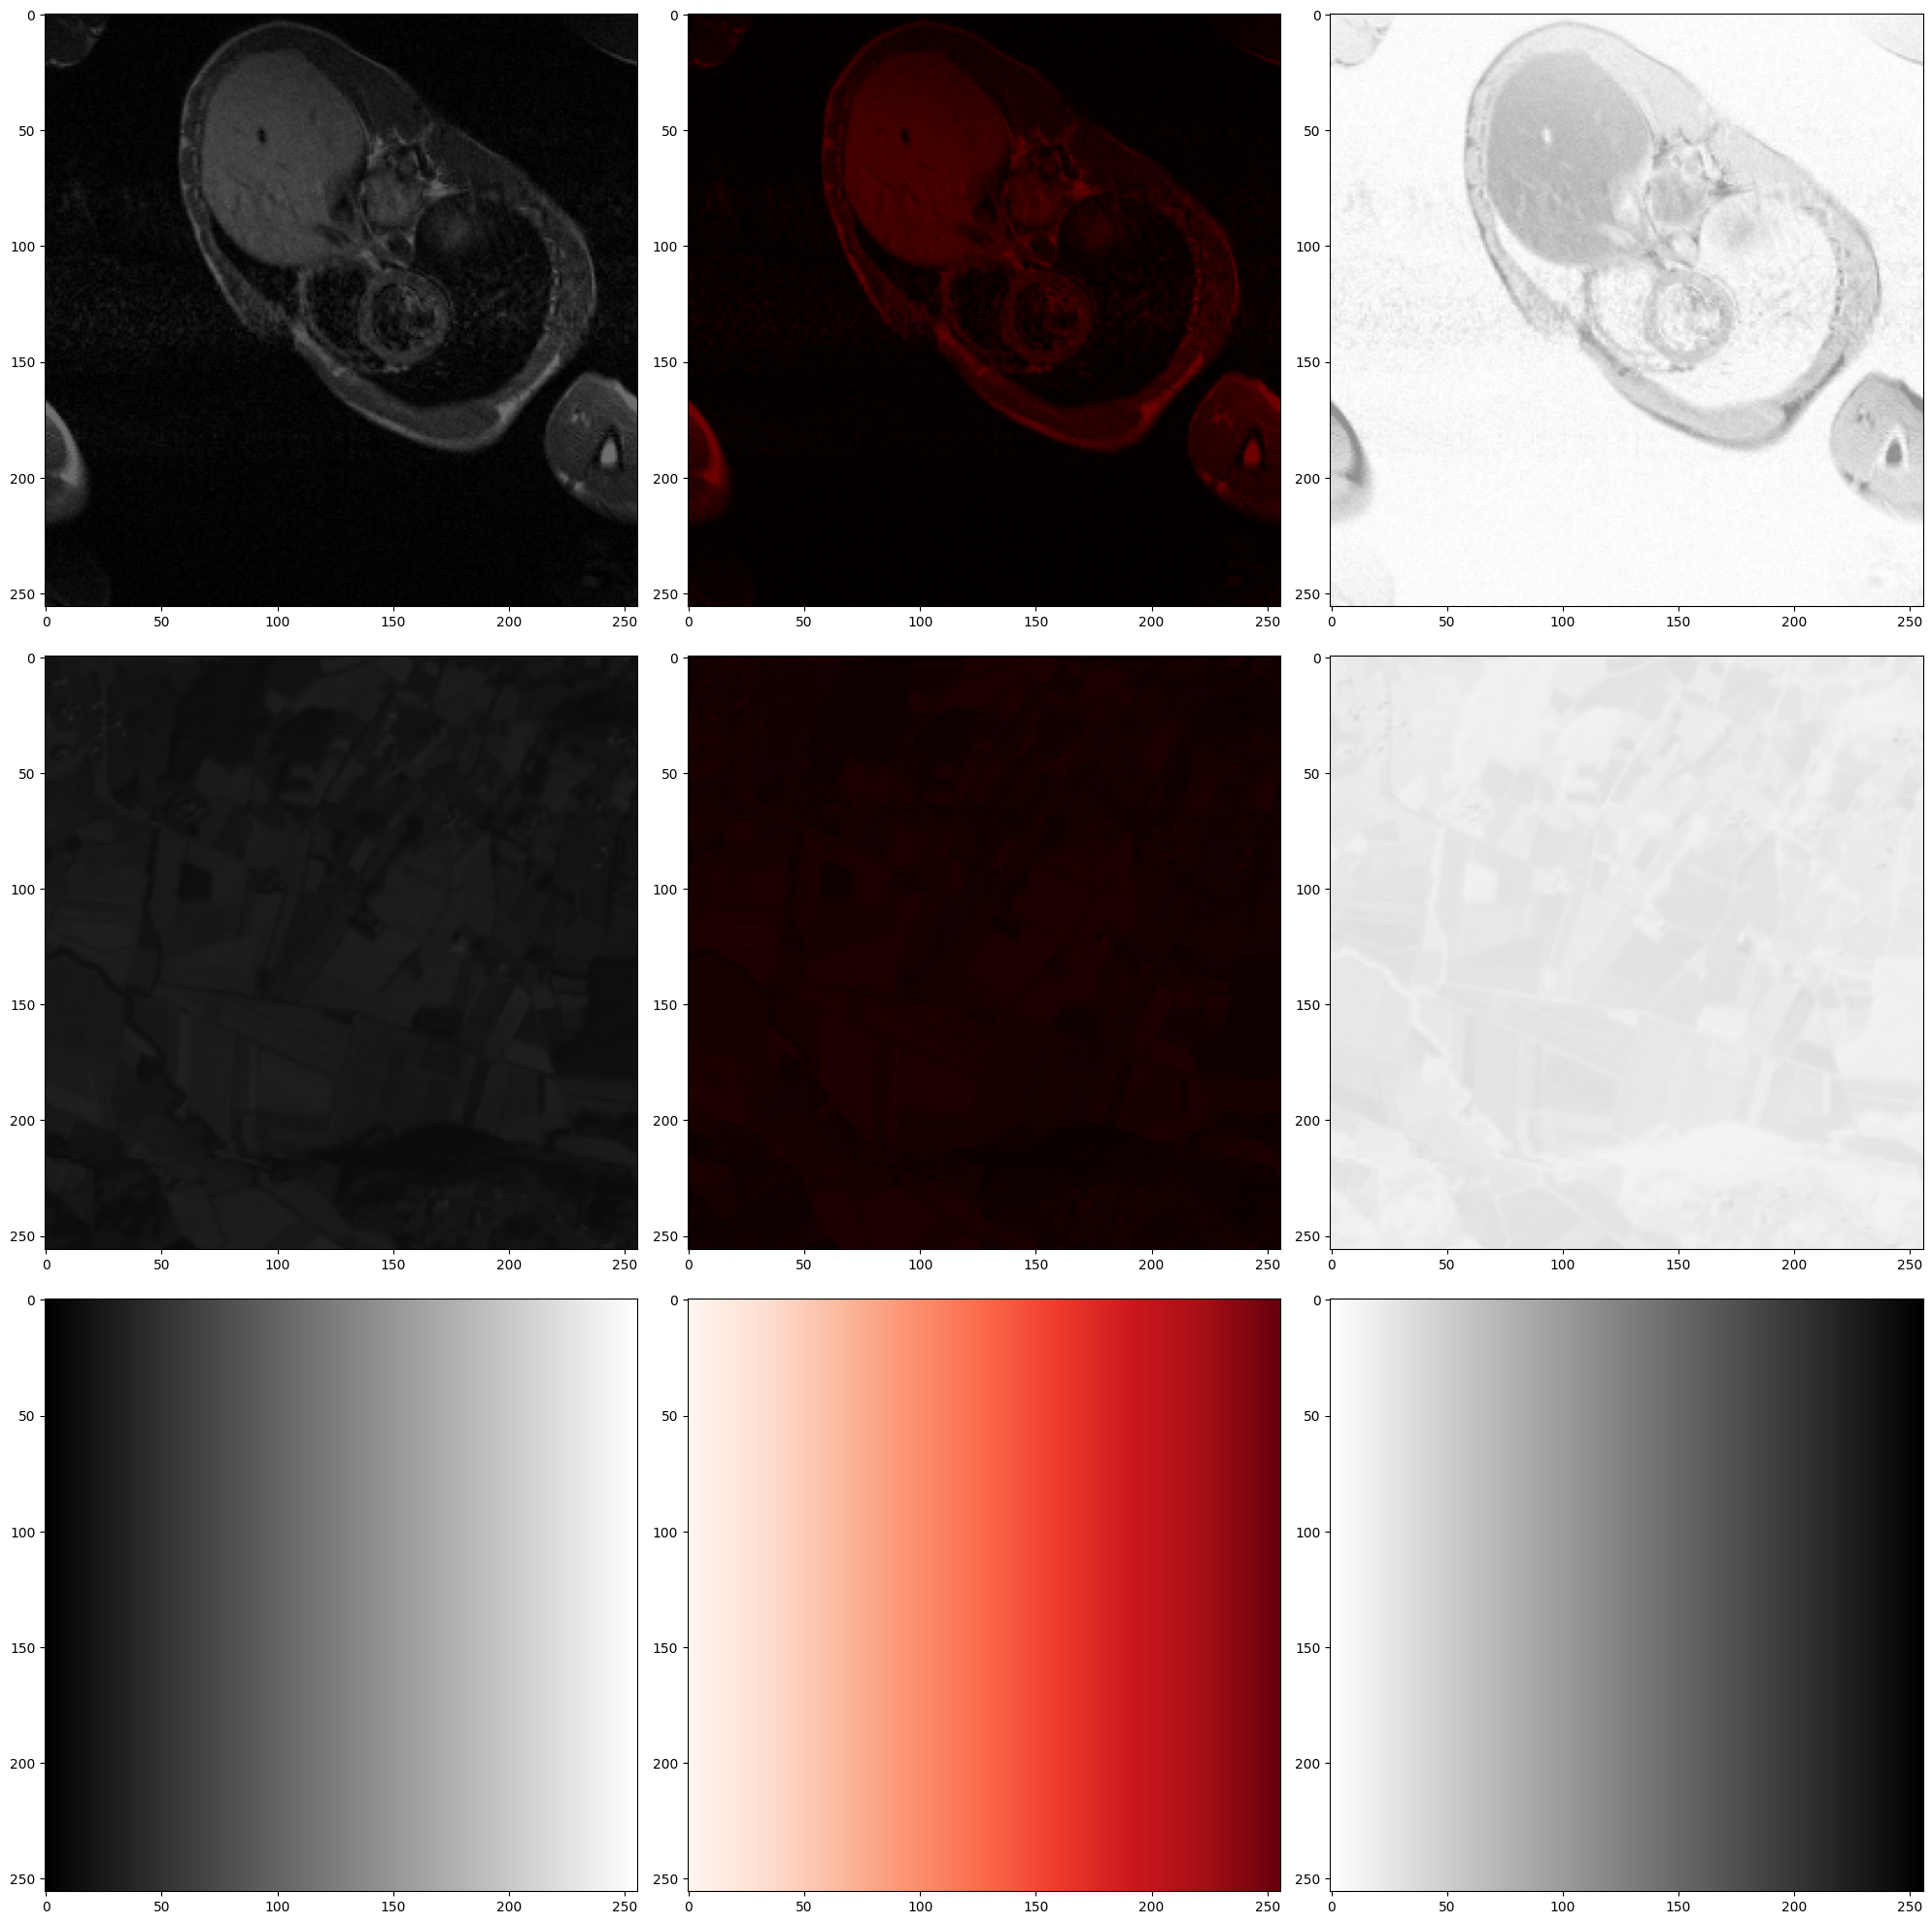

In [6]:
def color_img(image):
    lut_color = np.zeros((256, 1, 3), dtype=np.uint8)
    for i in range(256):
        lut_color[i, 0, 0] = i
        lut_color[i, 0, 1] = 0   
        lut_color[i, 0, 2] = 0 
    return cv2.LUT(image, lut_color)
def inverse_img(image):
    lut_inverse = np.zeros((256, 1), dtype=np.uint8)
    for i in range(0,256):
        lut_inverse[i] = 255 - i


    return cv2.LUT(image , lut_inverse )

fig, axes = plt.subplots(3,3, figsize = (20,20))  
axes[0][0].imshow(SCANNER,)
axes[0][1].imshow(color_img(SCANNER),)
axes[0][2].imshow(inverse_img(SCANNER))
axes[1][0].imshow(AQUITAIN,)
axes[1][1].imshow(color_img(AQUITAIN),)
axes[1][2].imshow(inverse_img(AQUITAIN))
axes[2][0].imshow(img, cmap = 'gray')
axes[2][1].imshow(img, cmap = 'Reds')
axes[2][2].imshow(inv, cmap = 'gray')
plt.tight_layout()
plt.show()

Como se puede observar, Aquitain es la imagen más dificil de dislumbrar pero con el filtro invertido es con el que mejor se ve la figura de la imagen. Con respecto al scanner, el filtro inverso y la imagen original permiten ver la figura mientras que el recolor rojo es mucho menos visible. En general, el filtro rojo resultó poco útil para mejorar la imagen en terminos de claridad para entender que es.

# Operaciones sobre scanner

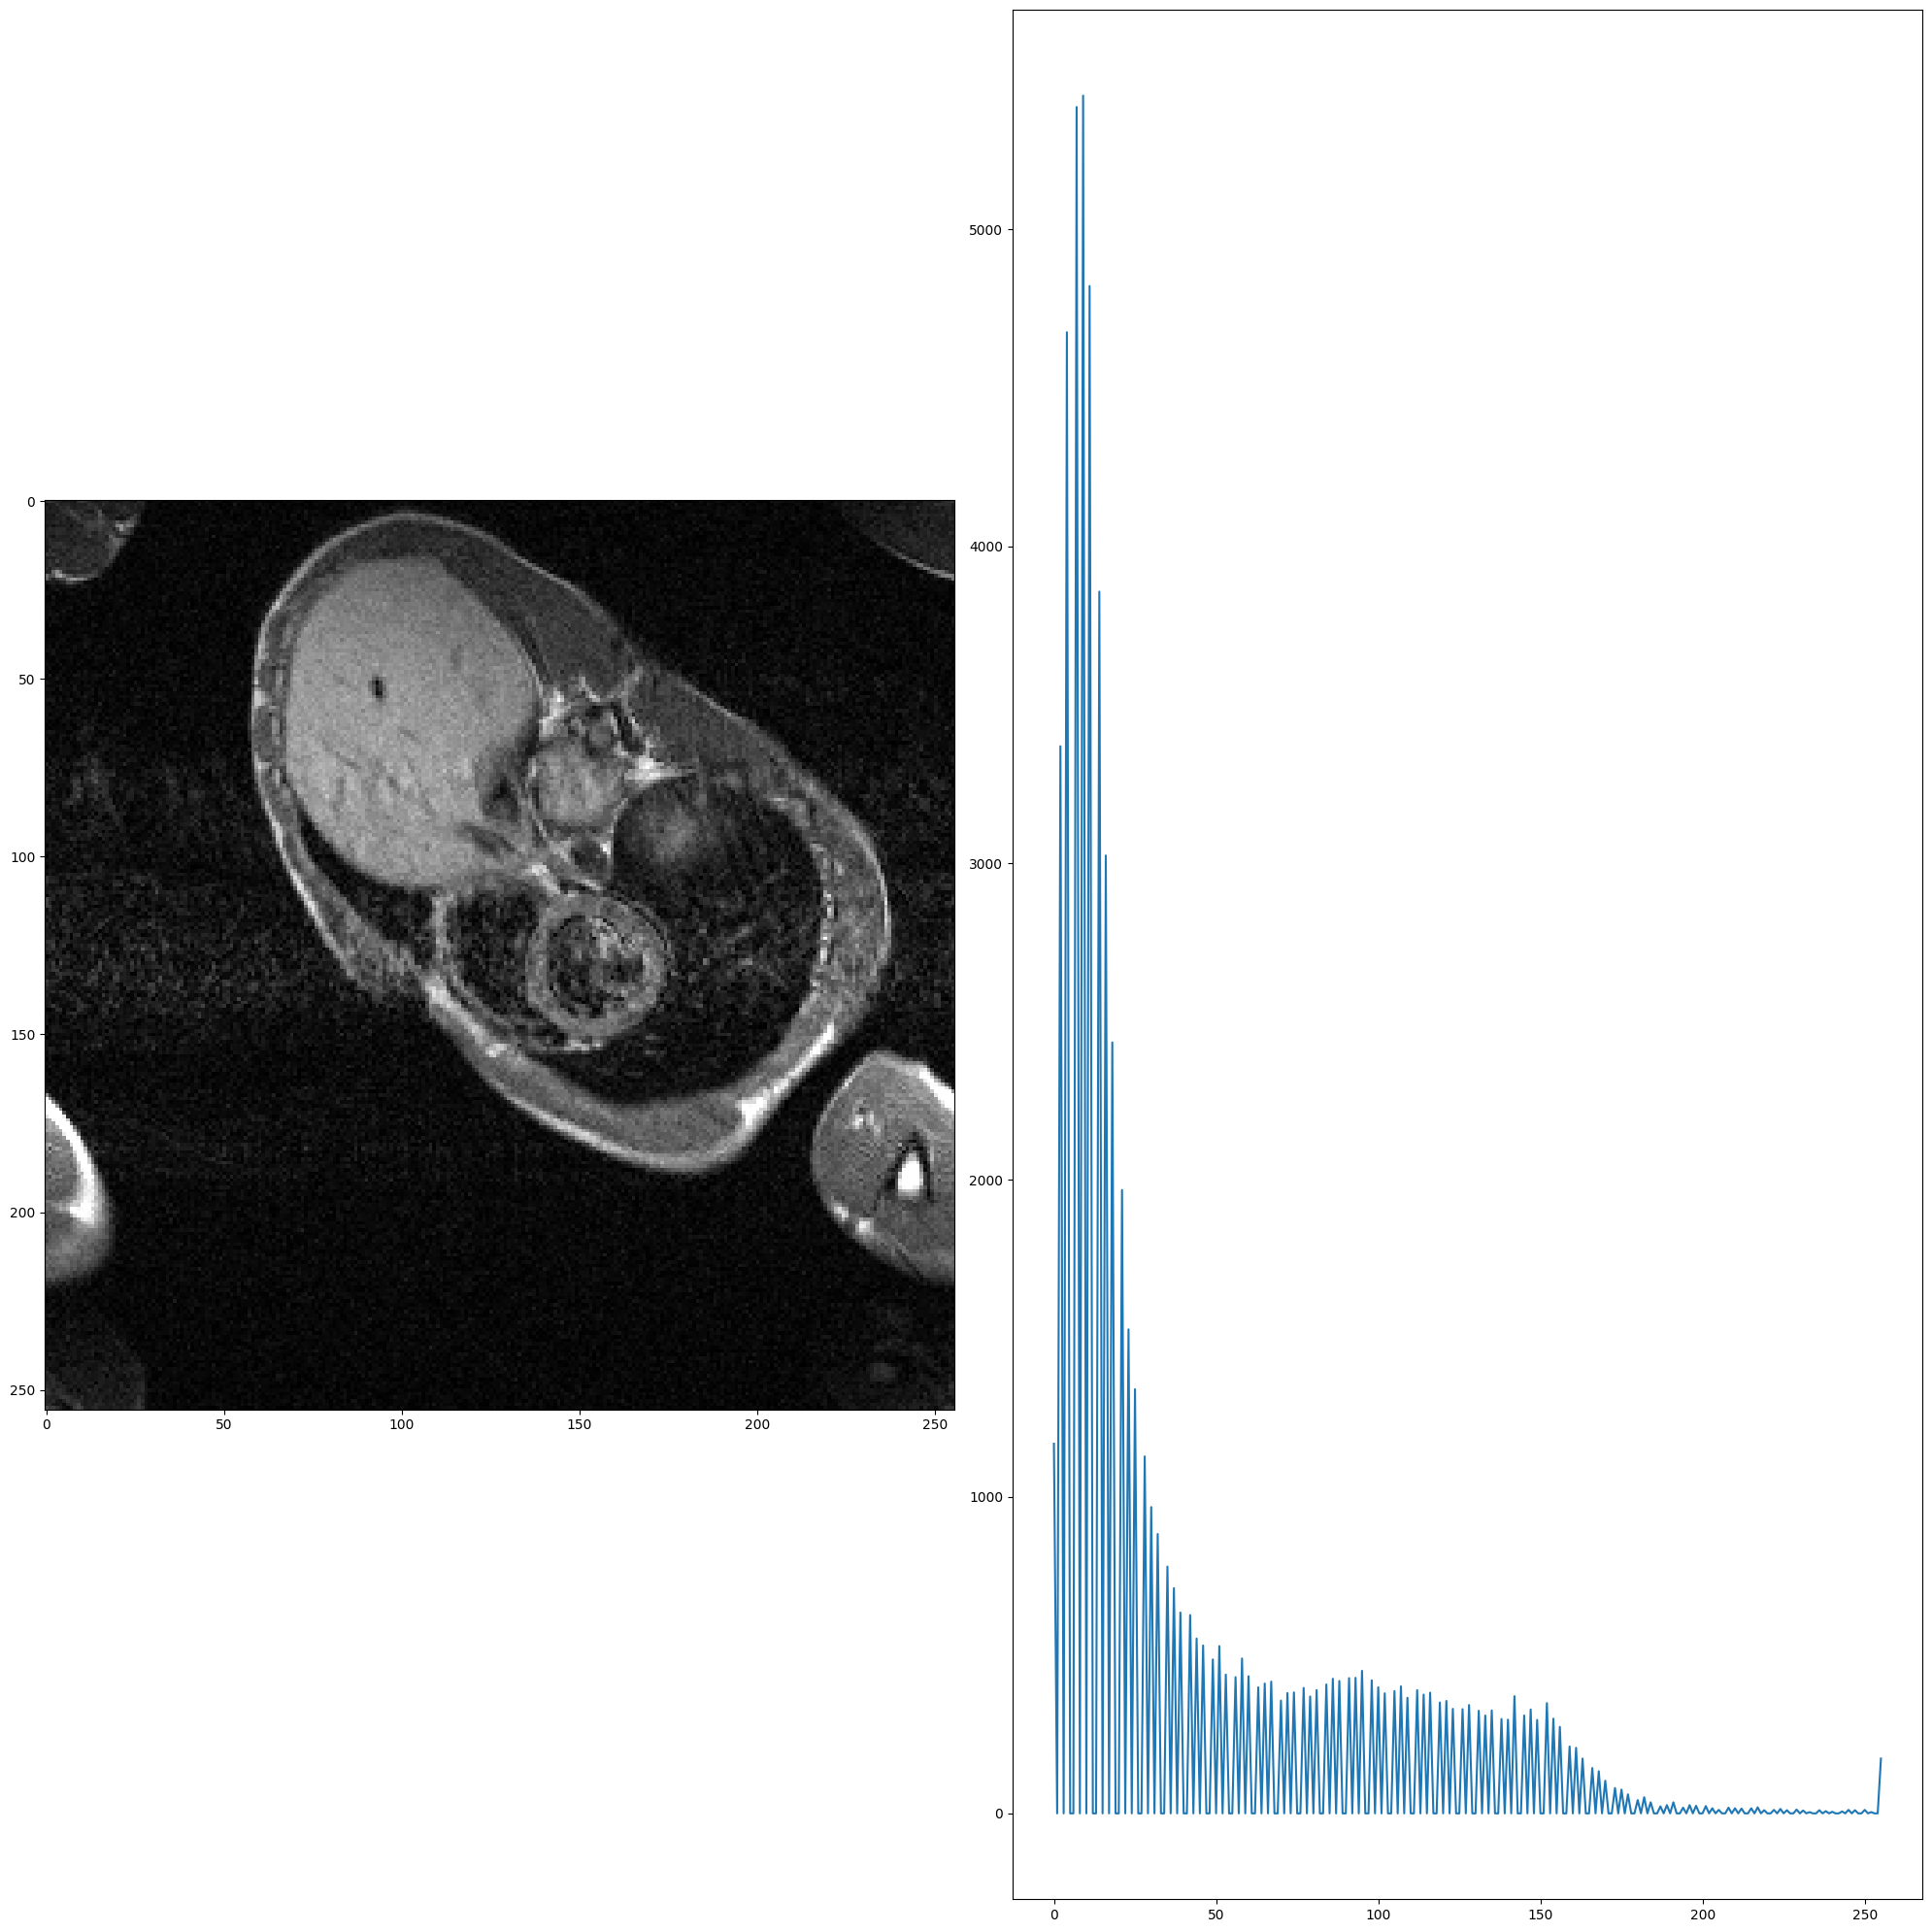

In [7]:
I_min = np.min(SCANNER)
I_max = np.max(SCANNER)

scanner_expandida = ((SCANNER - I_min) * (255 / (I_max - I_min))).astype(np.uint8)
hist_expadido = cv2.calcHist([scanner_expandida], [0], None, [256], [0, 256])

fig, axes = plt.subplots(1,2, figsize = (20,20))  
axes[0].imshow(scanner_expandida,)
axes[1].plot(hist_expadido)

plt.tight_layout()
plt.show()

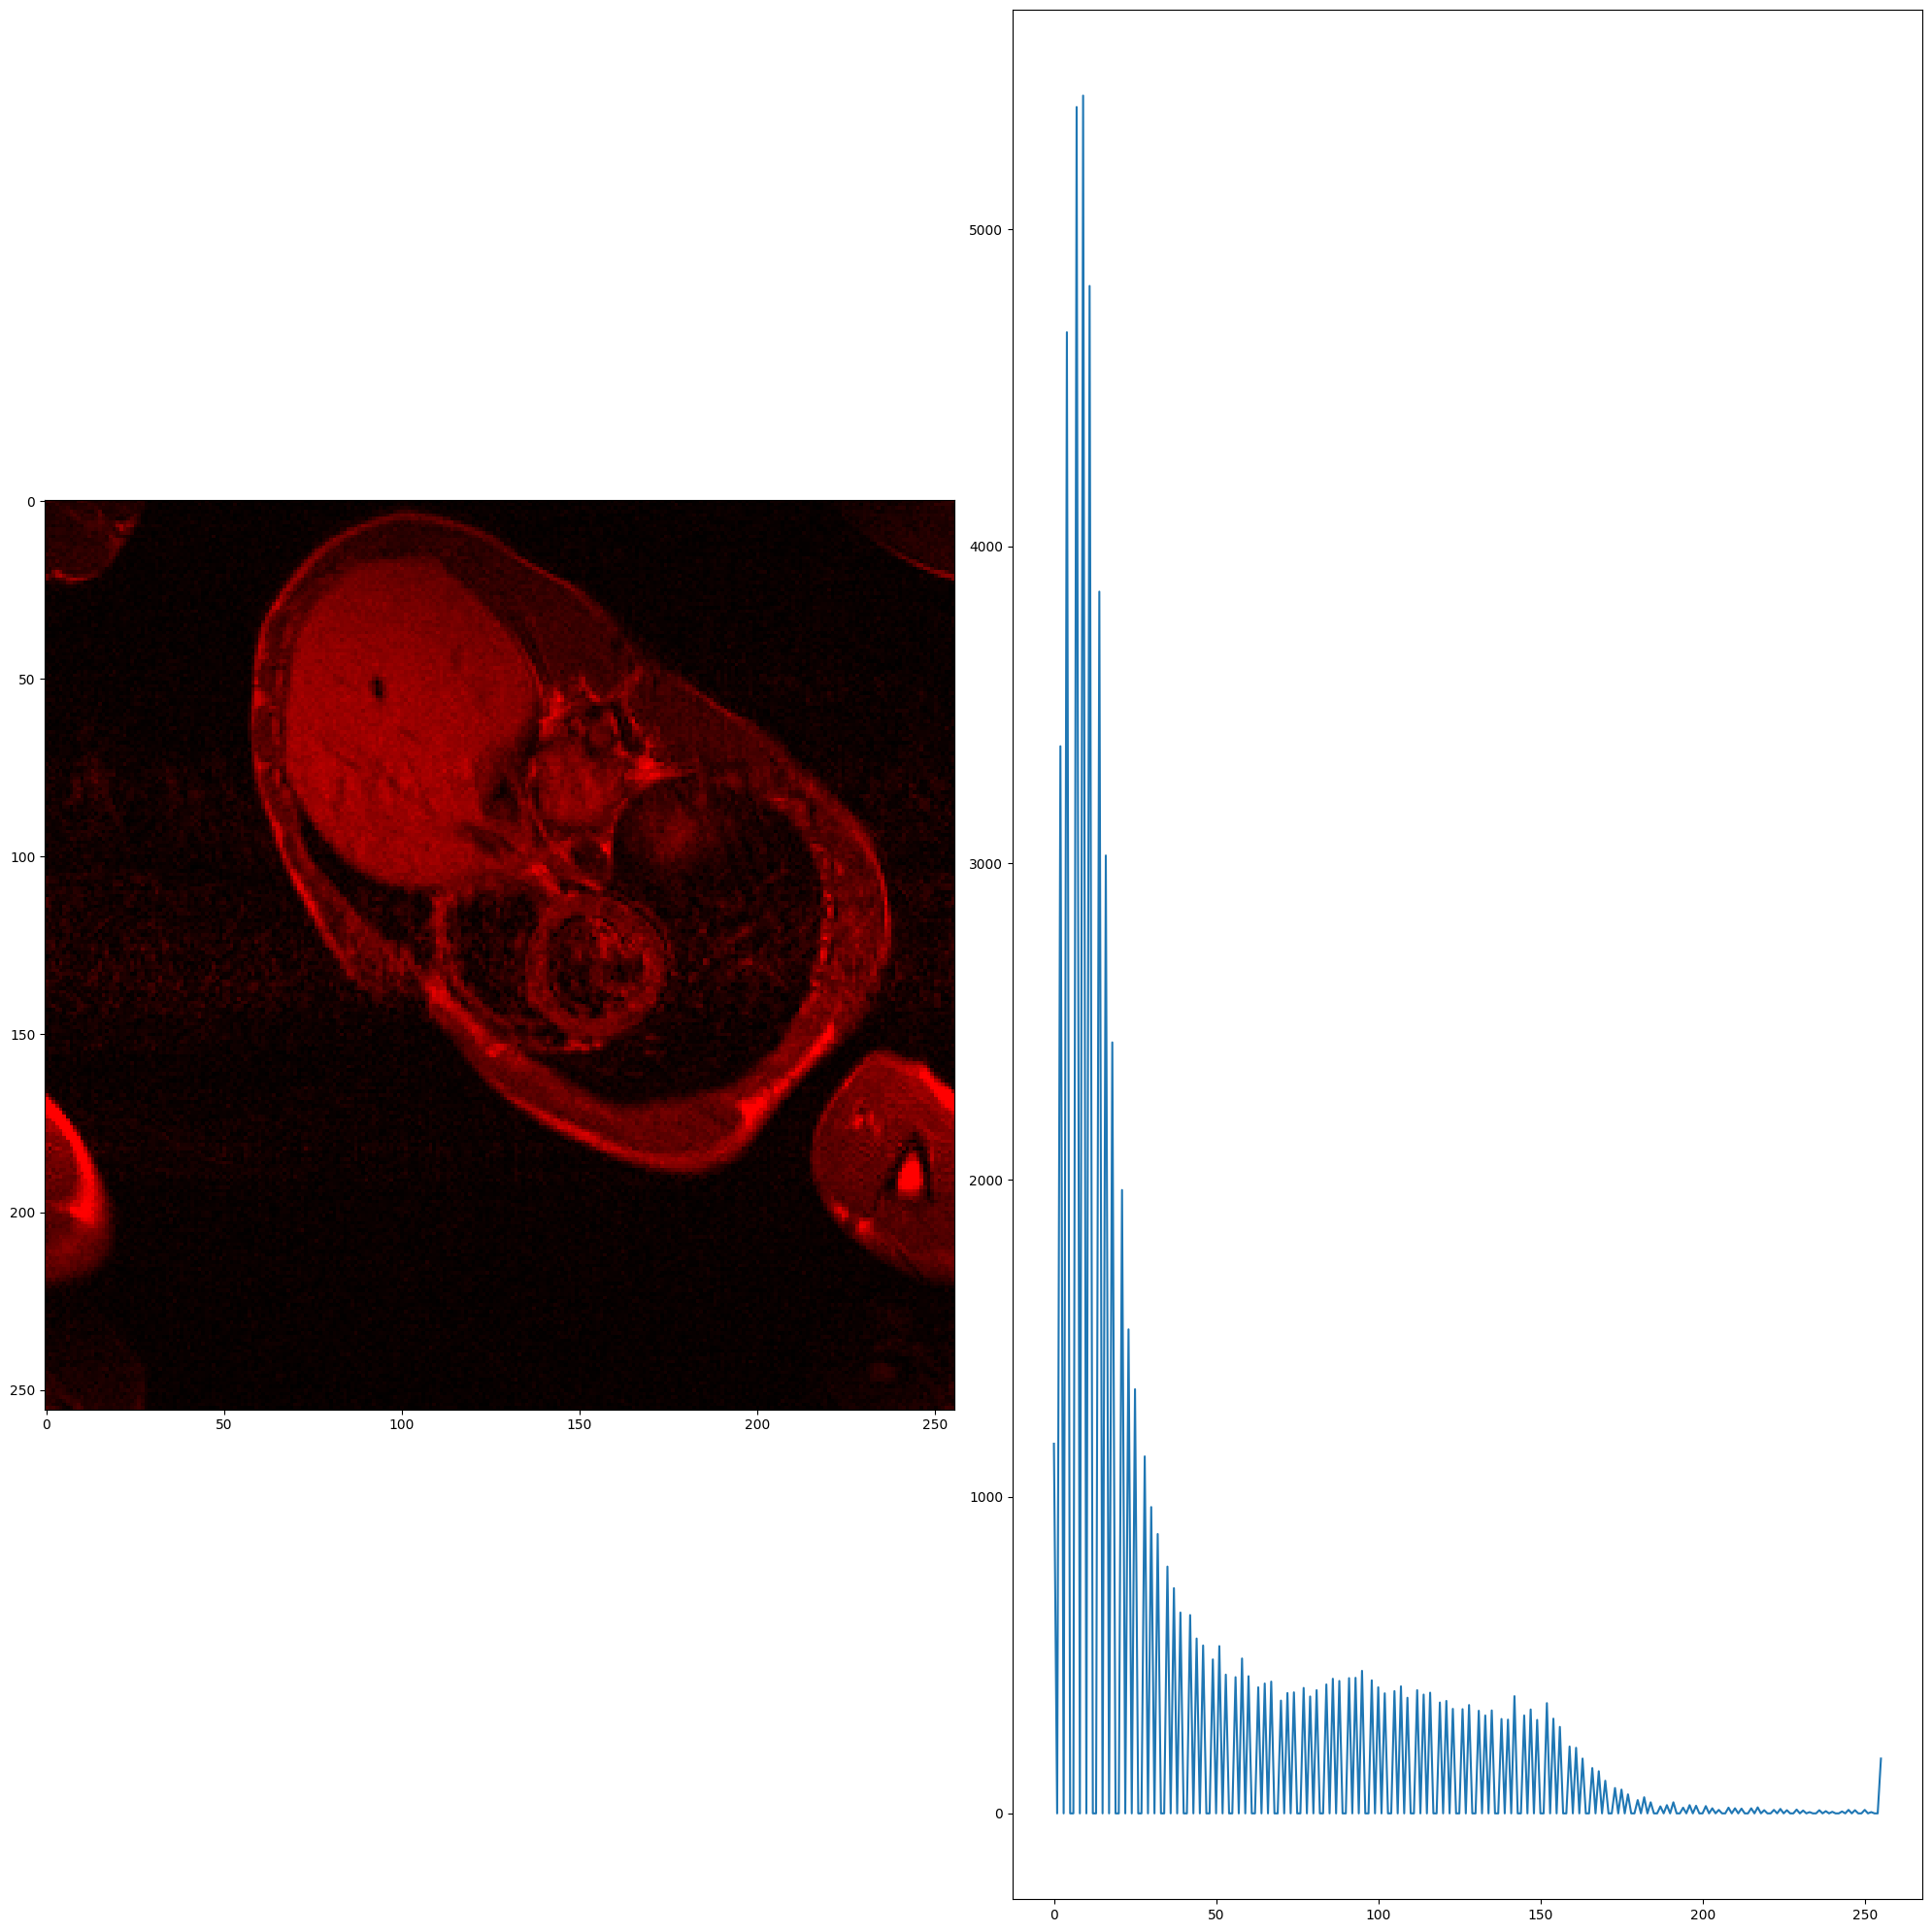

In [8]:
scanner_expandida_rojo = color_img(scanner_expandida)
hist_rojo = cv2.calcHist([scanner_expandida_rojo], [0], None, [256], [0, 256])

fig, axes = plt.subplots(1,2, figsize = (20,20))  
axes[0].imshow(scanner_expandida_rojo,)
axes[1].plot(hist_rojo)

plt.tight_layout()
plt.show()

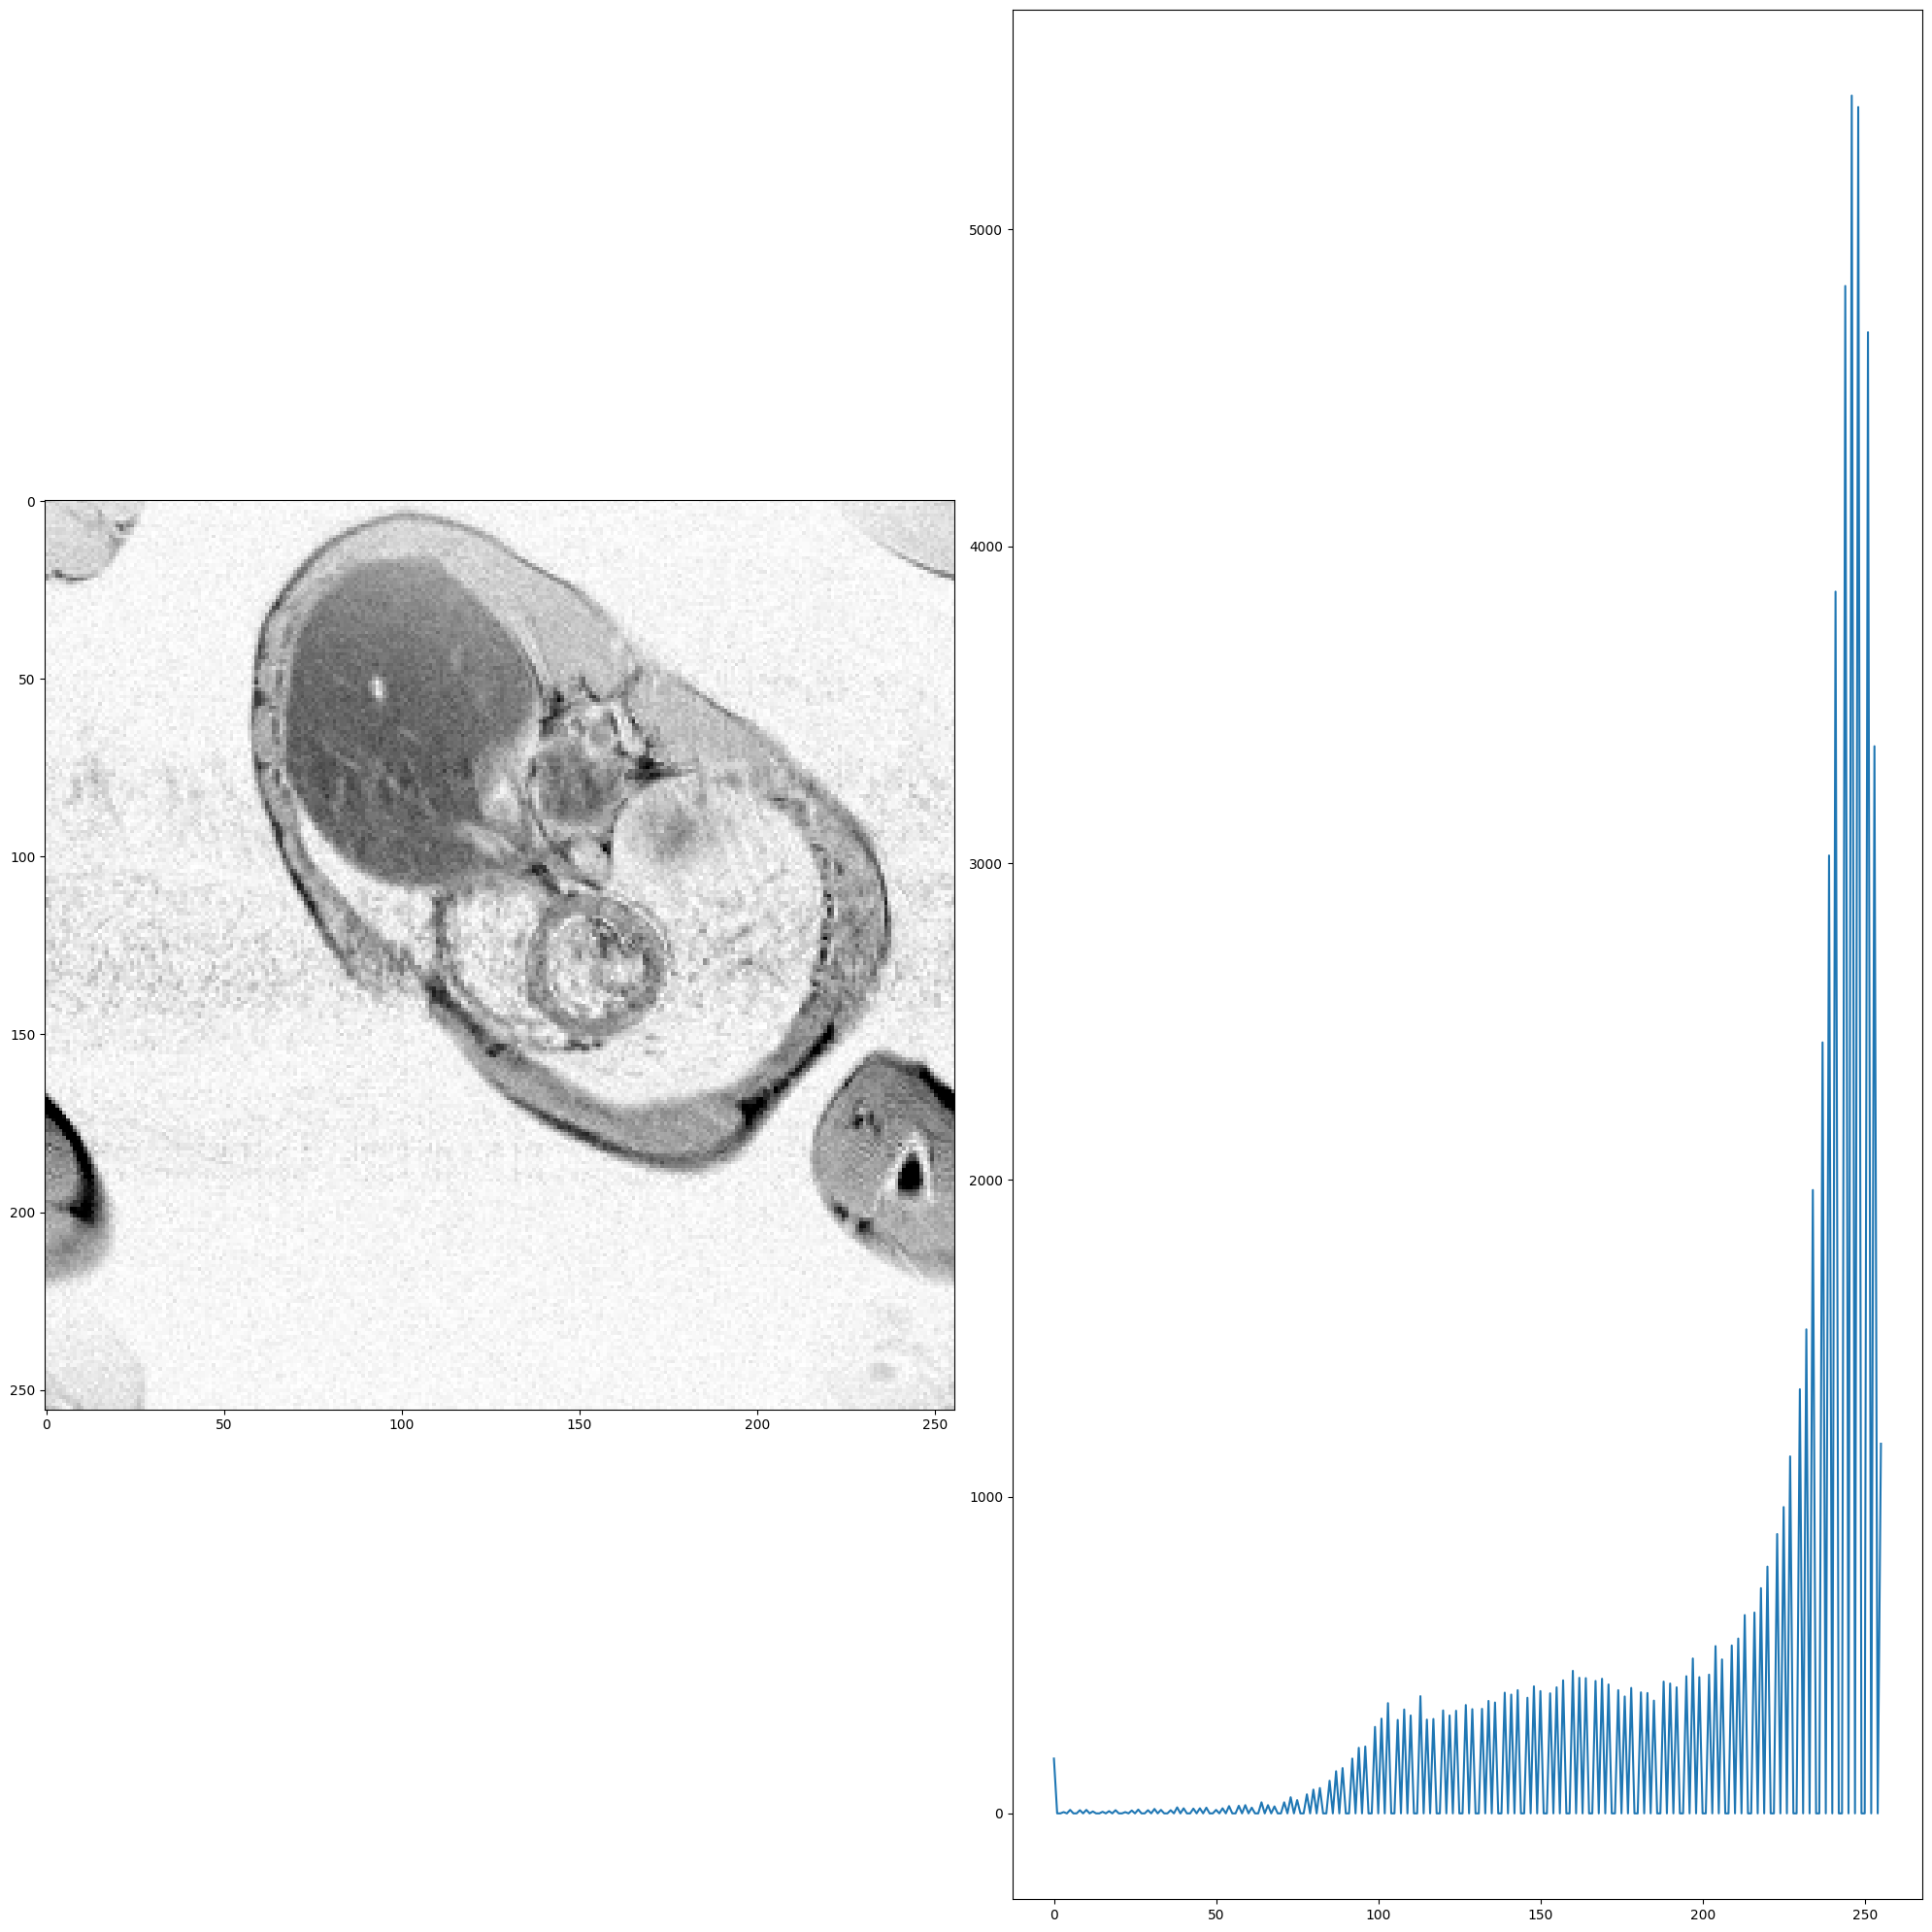

In [9]:
scanner_expandida_inv = inverse_img(scanner_expandida)
hist_inv = cv2.calcHist([scanner_expandida_inv], [0], None, [256], [0, 256])

fig, axes = plt.subplots(1,2, figsize = (20,20))  
axes[0].imshow(scanner_expandida_inv,)
axes[1].plot(hist_inv)

plt.tight_layout()
plt.show()

Como se puede apreciar, el recoloreado rojo no cambia el histograma y el filtro invertido refleja el diagrama como si fuera un espejo. Además, la expansión permite dislumbrar mucho mejor los detalles de la imagen con respecto a la original.